# Mixture Prior analysis for ROSMAP
Visualization of the mixture prior generated for ROSMAP

## Context

Mixture prior for multivariate SuSiE is produced by the [mixture_prior](https://hsun3163.github.io/neuro-twas/workflow/mixture_prior.html) pipeline. For each gene, the pipeline performs factor analysis on normalized molecular weights for SNVs with strongest univariate signals on three tissues to acquir a list of factors that partially reflect the whole genome covariance strucure for normalized molecular weights. The proportion of genome explained by each of the factor are estimated by extreme deconvolution(ED). Three implementation of ED are used: TEEM, UDR(ed), and mashR(ed_brovy). The mixture priors generated are visualized in this notebook 

## Prepration

In [35]:
library("dplyr")
library("purrr")
library("tibble") 
library("tidyr")
library("ggplot2") 

plot_sharing = function(X, to_cor=FALSE, title="", remove_names=F) {
    clrs <- colorRampPalette(rev(c("#D73027","#FC8D59","#FEE090","#FFFFBF",
                                   "#E0F3F8","#91BFDB","#4575B4")))(128)
    if (to_cor) lat <- cov2cor(X)
    else lat = X/max(diag(X))
    lat[lower.tri(lat)] <- NA
    n <- nrow(lat)
    if (remove_names) {
      colnames(lat) = NULL
      rownames(lat) = NULL
    }
    return(lattice::levelplot(lat[n:1,],col.regions = clrs,
                            xlab = "",ylab = "", main=title,
                            colorkey = TRUE,at = seq(-1,1,length.out = 128),
                            scales = list(cex = 0.6,x = list(rot = 45))))
} 

dir = "/home/hs3163/Project/Genome_prior/mixture_prior/output/susie."
model = c("ed_bovy", "ed","teem")
susie_edbovy = readRDS("/home/hs3163/Project/Genome_prior/mixture_prior/output/susie.ed_bovy.rds")
susie_ed = readRDS("/home/hs3163/Project/Genome_prior/mixture_prior/output/susie.ed.rds")
susie_teem = readRDS("/home/hs3163/Project/Genome_prior/mixture_prior/output/susie.teem.rds")

## Distribution of Weights

In [80]:
# Loading the three rds into one meta table
dat =  tibble(model = model)%>%
            mutate(rds = map(model,~readRDS(paste(dir,.x,".rds",sep = ""))),
                  meta = map2(rds,model,~data.frame(names(.x$U), .x$w, stringsAsFactors=F))
                  )
meta = dat%>%select(model,meta)%>%unnest
colnames(meta) = c("Model","Components","Weights")

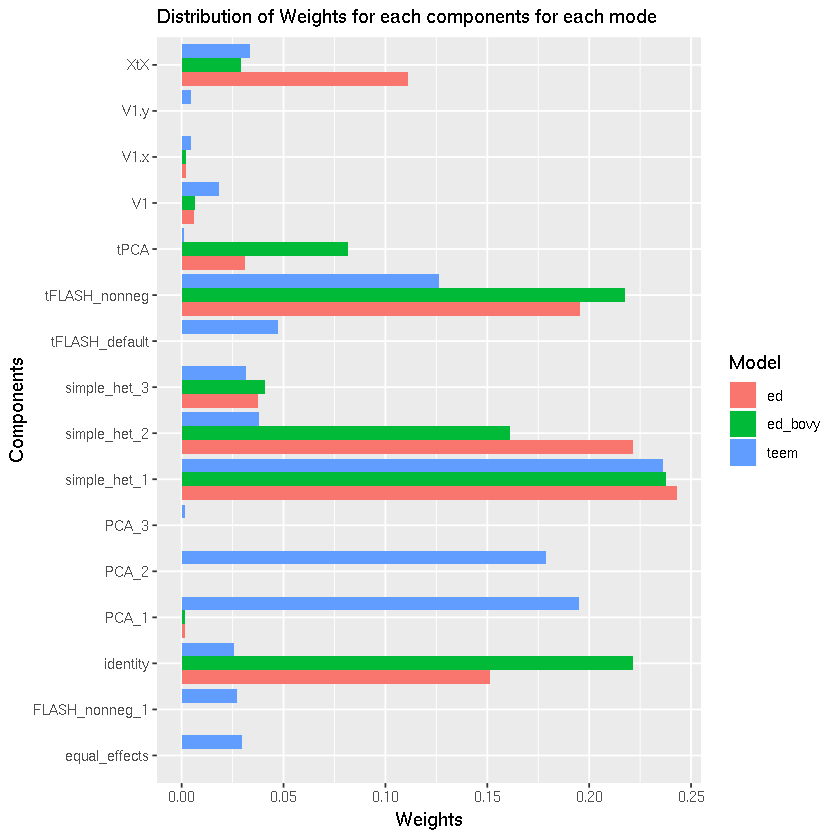

In [81]:
meta%>%ggplot(aes(x = Components, y = Weights,fill = Model ))+geom_col(position = "dodge")+coord_flip()+
            ggtitle("Distribution of Weights for each components for each mode")

## Visualization of component of interest 
### simpel_het_1

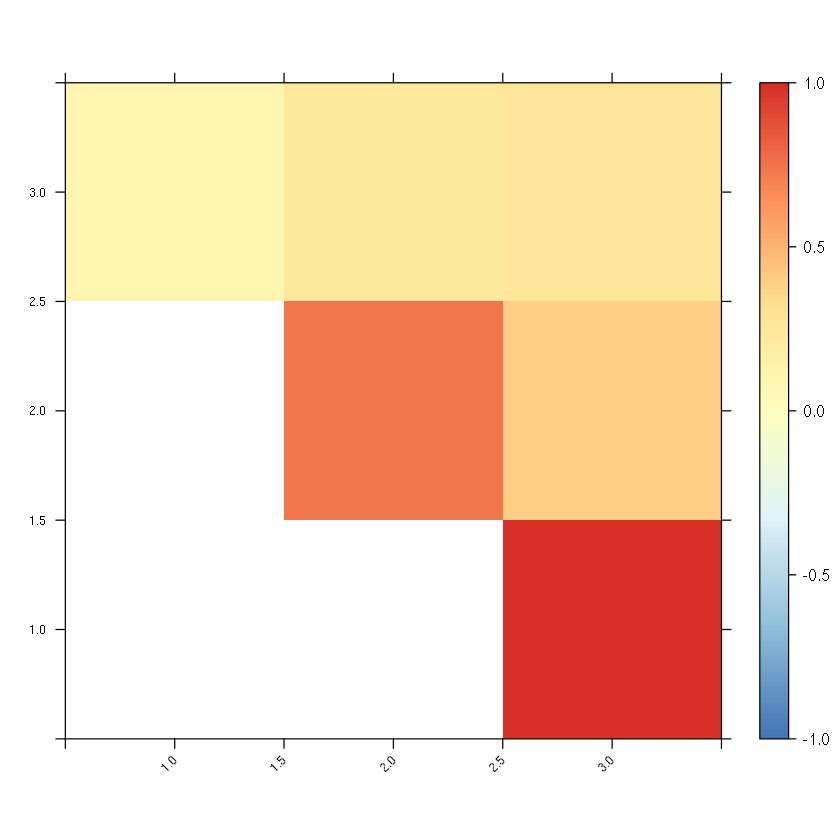

[[1]]

[[2]]

[[3]]


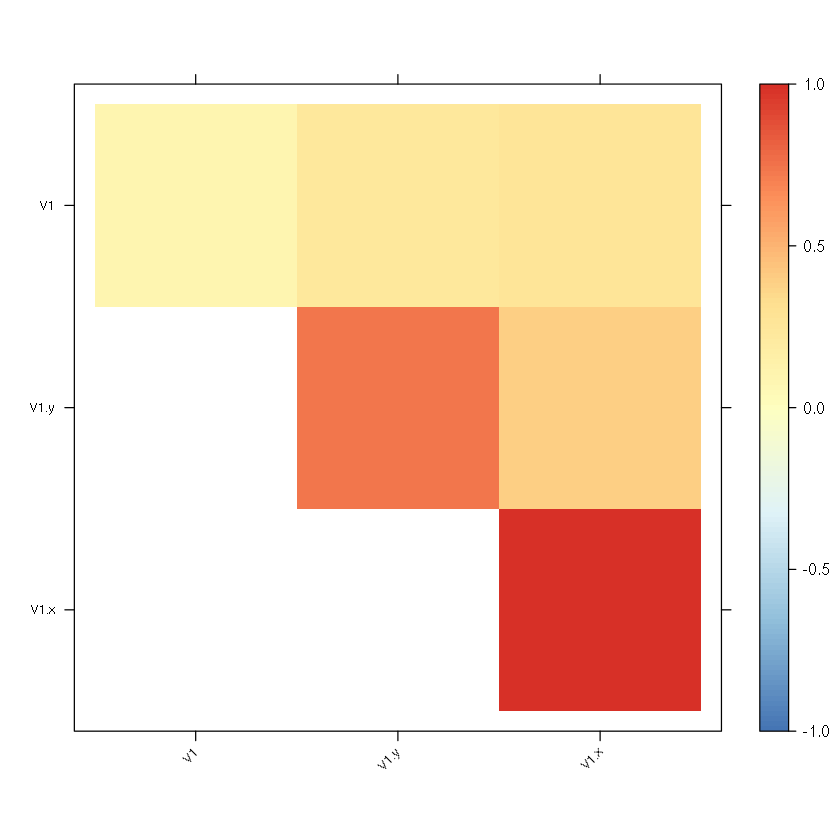

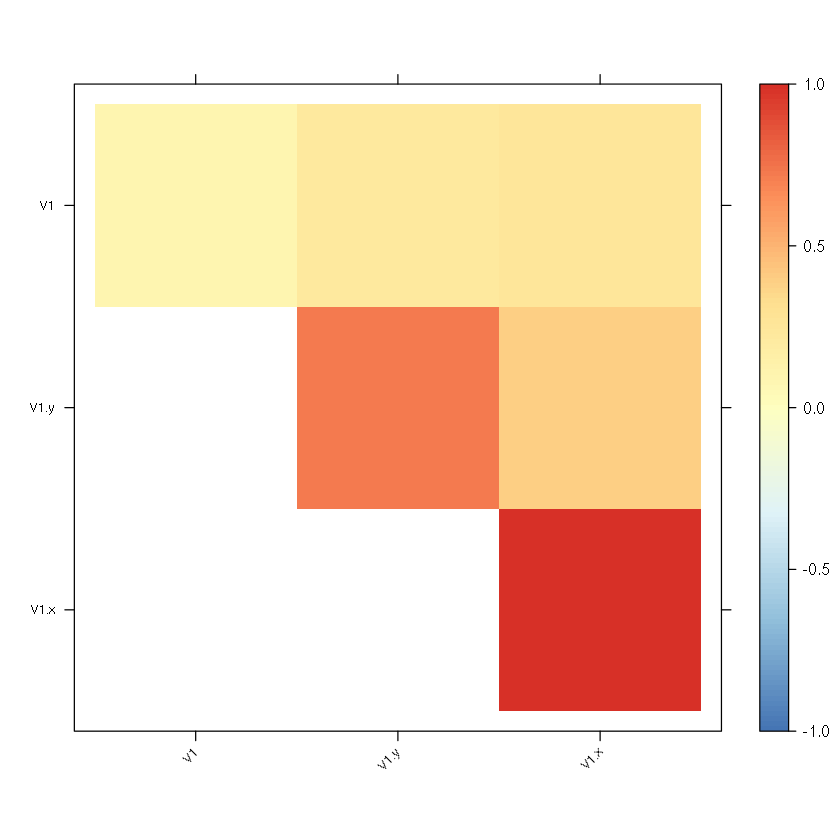

In [118]:
dat%>%mutate(
plot_u = map(rds,~plot_sharing(.x$U[["simple_het_1"]], to_cor = F, remove_names = FALSE)     )
)%>%pull(plot_u)

## simple_het_2

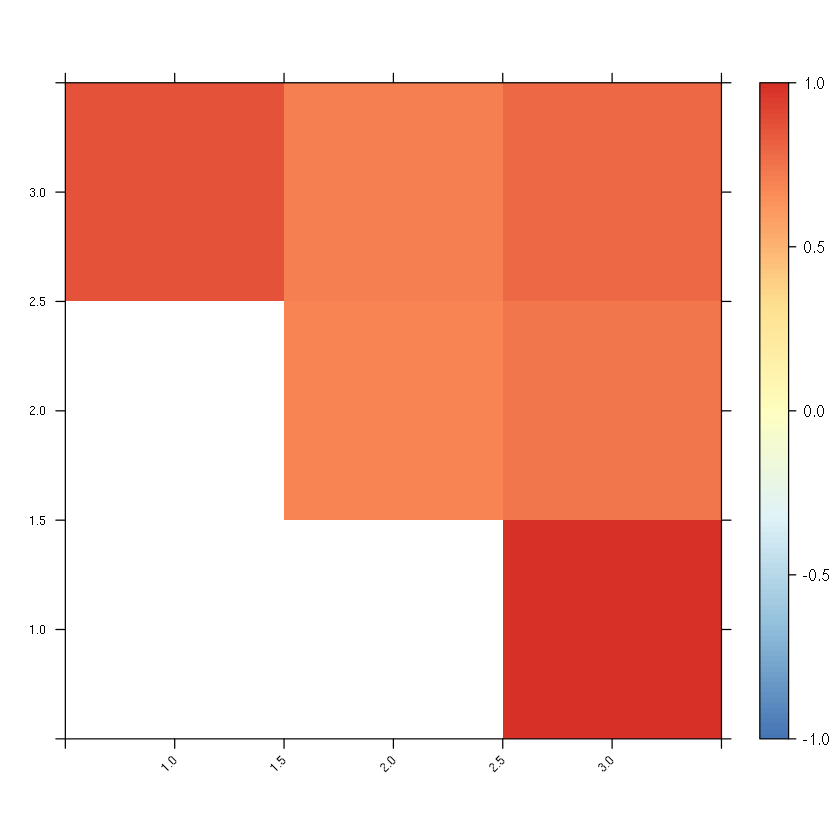

[[1]]

[[2]]

[[3]]


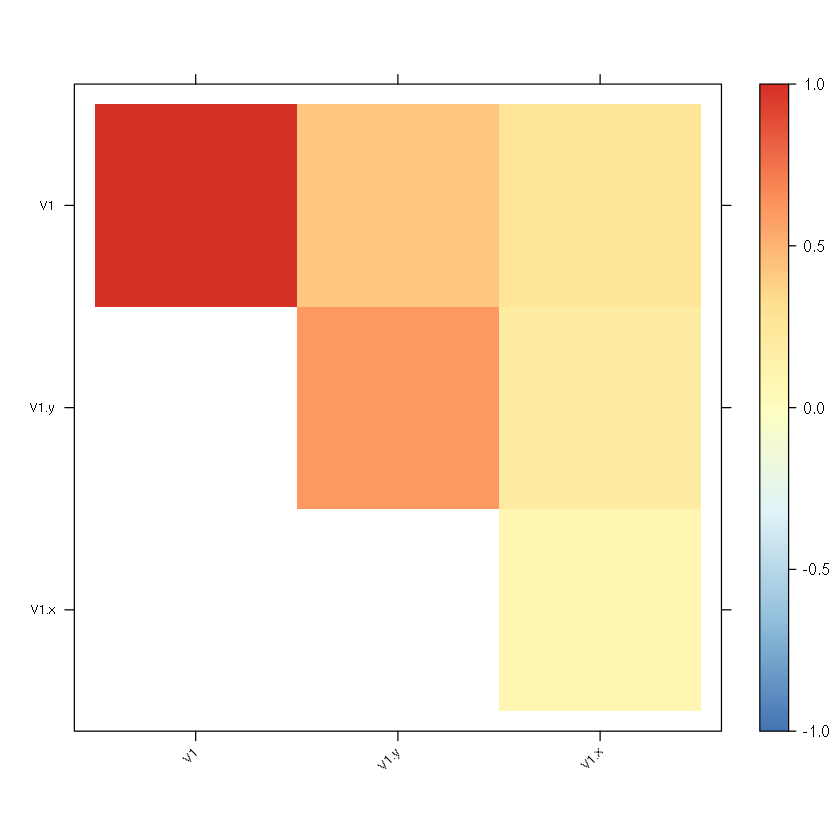

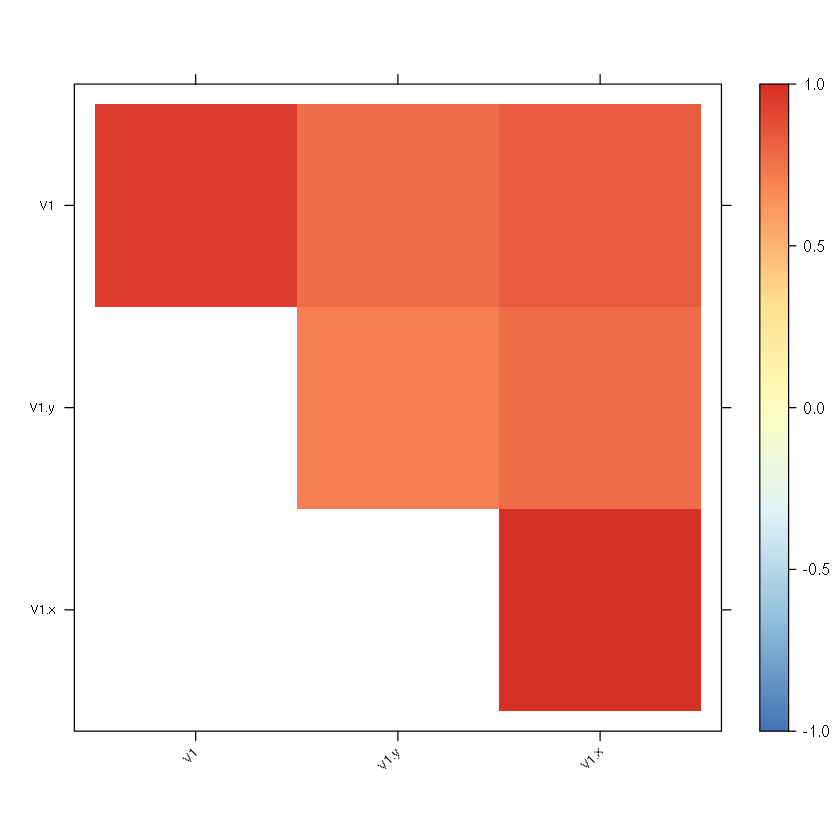

In [116]:
dat%>%mutate(
plot_u = map(rds,~plot_sharing(.x$U[["simple_het_2"]], to_cor = F, remove_names = FALSE)     )
)%>%pull(plot_u)

# tFLASH_nonneg

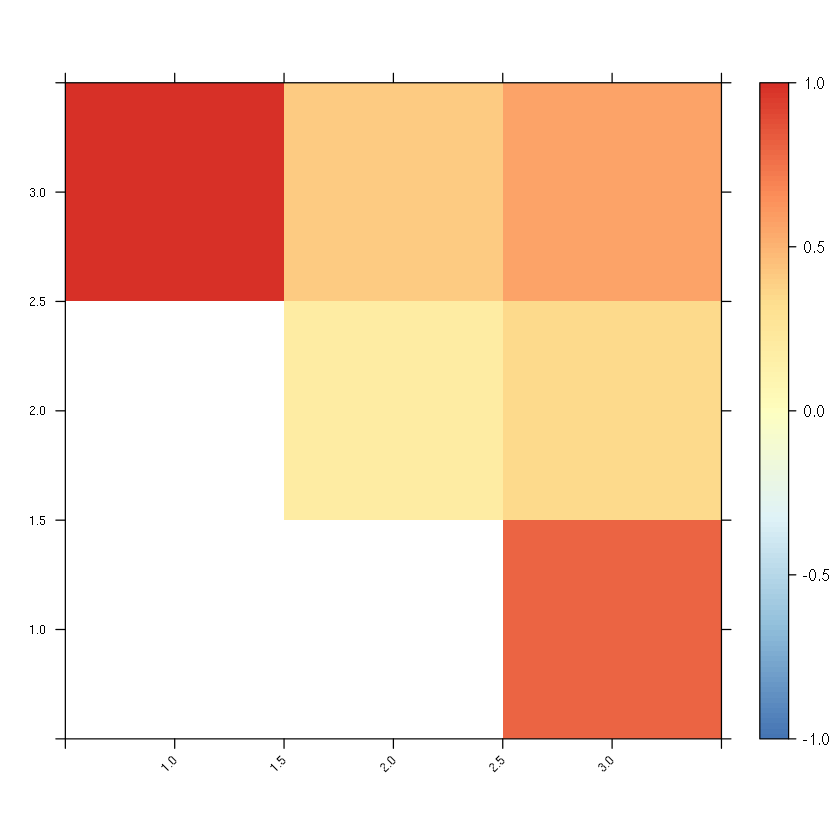

[[1]]

[[2]]

[[3]]


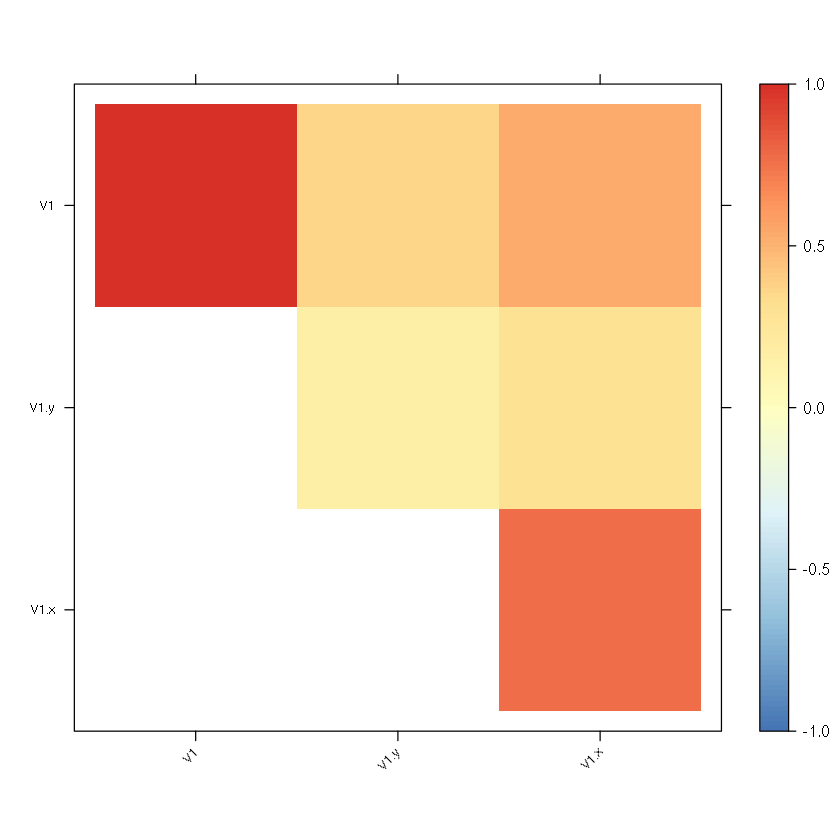

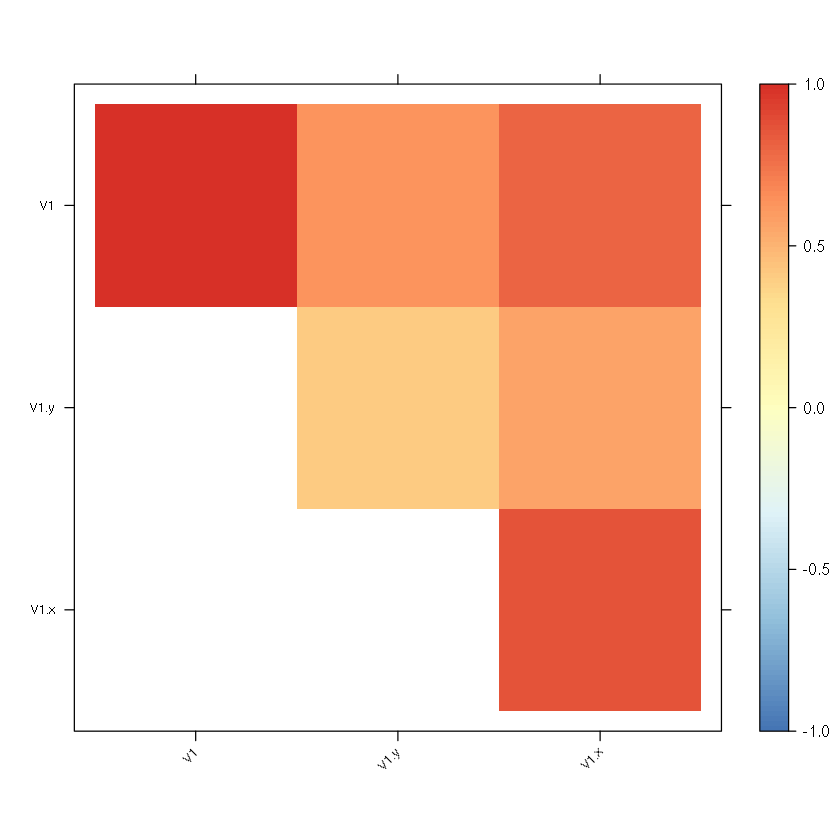

In [122]:
dat%>%mutate(
plot_u = map(rds,~plot_sharing(.x$U[["tFLASH_nonneg"]], to_cor = F, remove_names = FALSE)     )
)%>%pull(plot_u)

## Identity

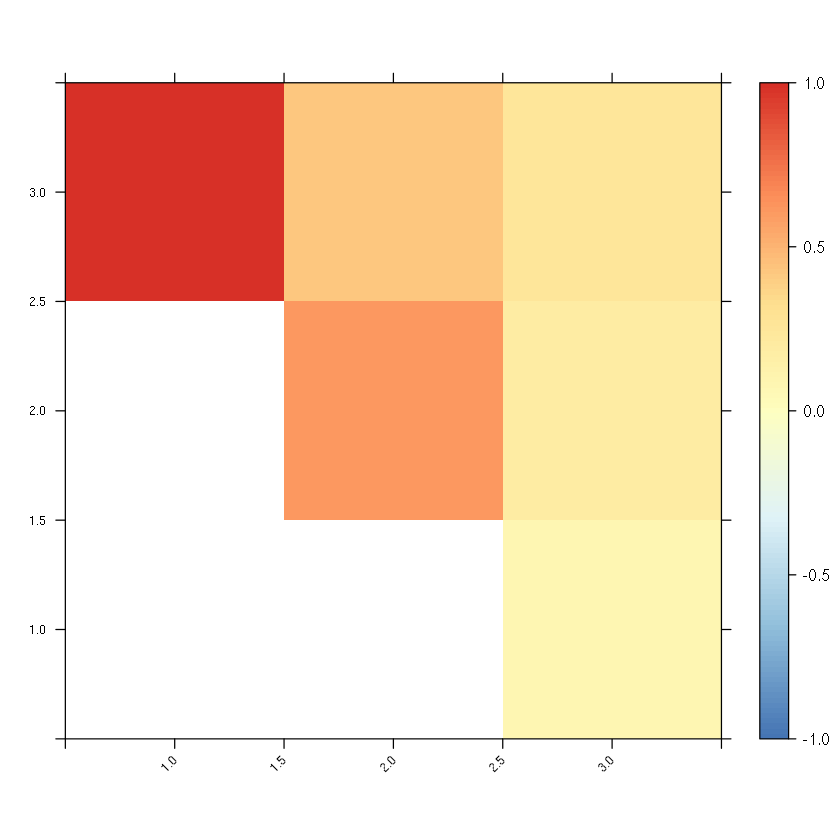

[[1]]

[[2]]

[[3]]


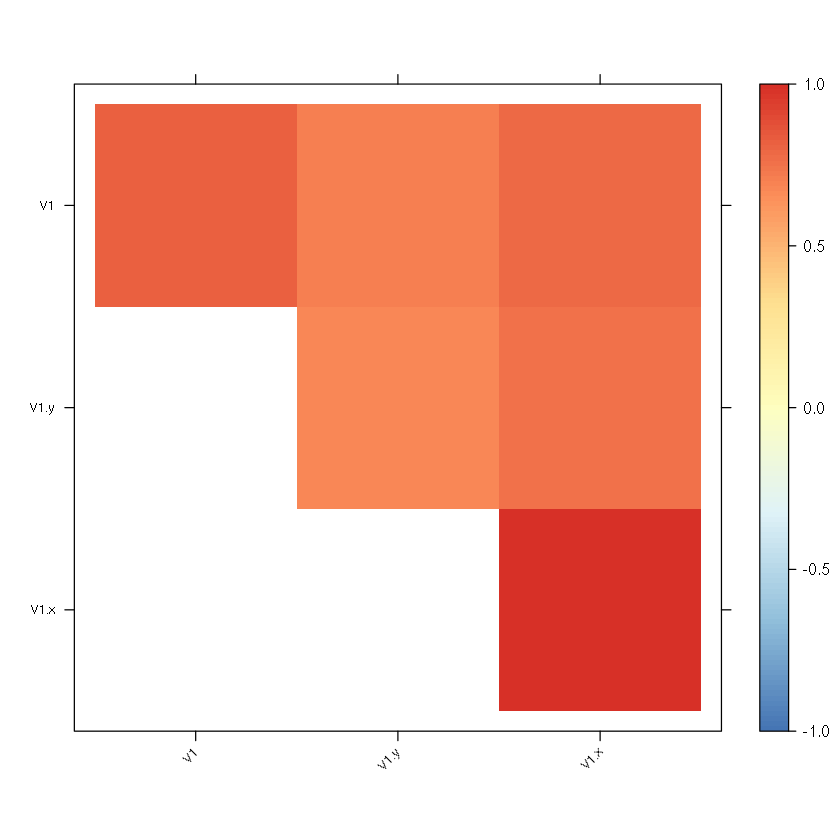

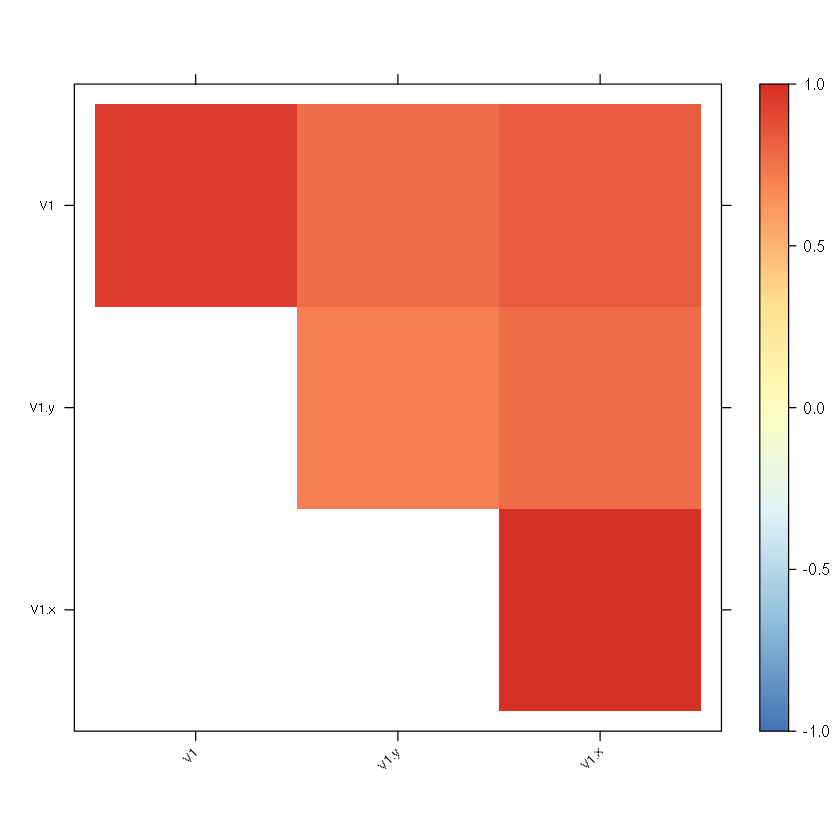

In [123]:
dat%>%mutate(
plot_u = map(rds,~plot_sharing(.x$U[["identity"]], to_cor = F, remove_names = FALSE)     )
)%>%pull(plot_u)